In [4]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy.signal import butter, filtfilt


In [16]:
# Parameters
target_sample_rate = 16000
n_fft = 2048
hop_length = 512
n_mels = 128
clip_duration = 5
target_width = 128
negative_dir = 'dataset/Negative'
weevil_dir = 'dataset/S_oryzae'
rd_dir = 'dataset/R_dominica'
tc_dir = 'dataset/T_castaneum'

In [17]:
low_cutoff = 93.75  # Low-pass cut-off frequency in Hz
high_cutoff = 2500  # High-pass cut-off frequency in Hz
filter_order = 4    # Order of the filter

# Butterworth band-pass filter
def butter_bandpass(lowcut, highcut, sr, order=4):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Applying band-pass filter to an audio signal
def bandpass_filter(data, lowcut, highcut, sr, order=4):
    b, a = butter_bandpass(lowcut, highcut, sr, order=order)
    y = filtfilt(b, a, data)  # Apply the filter to the data
    return y

In [ ]:
rw_audio, _ = librosa.load('dataset/S_oryzae/rice_weevil_17.wav', sr=target_sample_rate)

filtered_rw_audio = bandpass_filter(
    rw_audio, lowcut=low_cutoff, highcut=high_cutoff,
    sr=target_sample_rate, order=filter_order
)

filtered_rw_audio = filtered_rw_audio / np.max(np.abs(filtered_rw_audio))

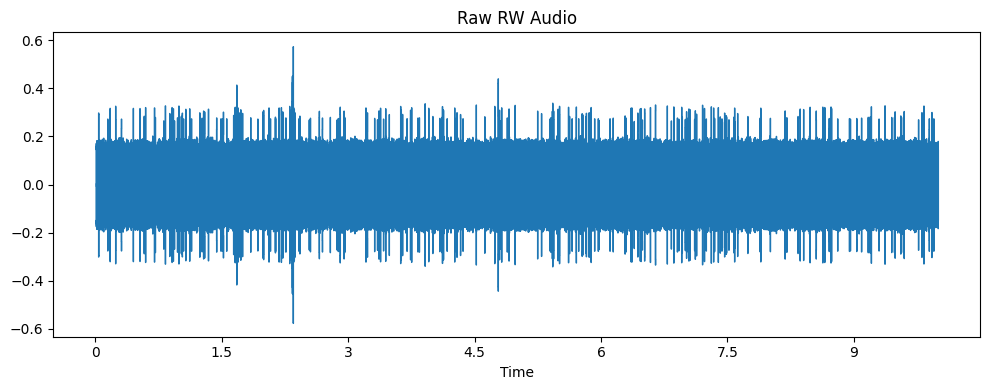

In [33]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(rw_audio, sr=target_sample_rate)
plt.title("Raw RW Audio")
plt.tight_layout()
plt.show()

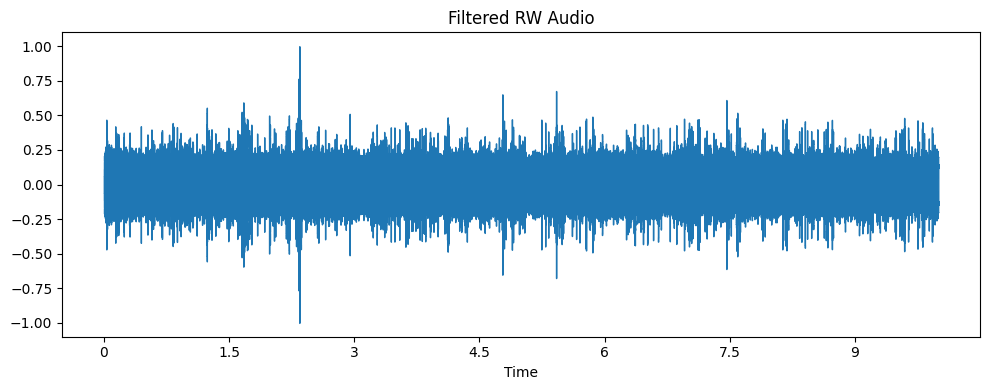

In [41]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(filtered_rw_audio, sr=target_sample_rate)
plt.title("Filtered RW Audio")
plt.tight_layout()
plt.show()

In [ ]:
neg_audio, _ = librosa.load('audio/1-4211-A-12.wav', sr=target_sample_rate)

filtered_negative_audio = bandpass_filter(
    neg_audio, lowcut=low_cutoff, highcut=high_cutoff,
    sr=target_sample_rate, order=filter_order
)

filtered_negative_audio = filtered_negative_audio / np.max(np.abs(filtered_negative_audio))

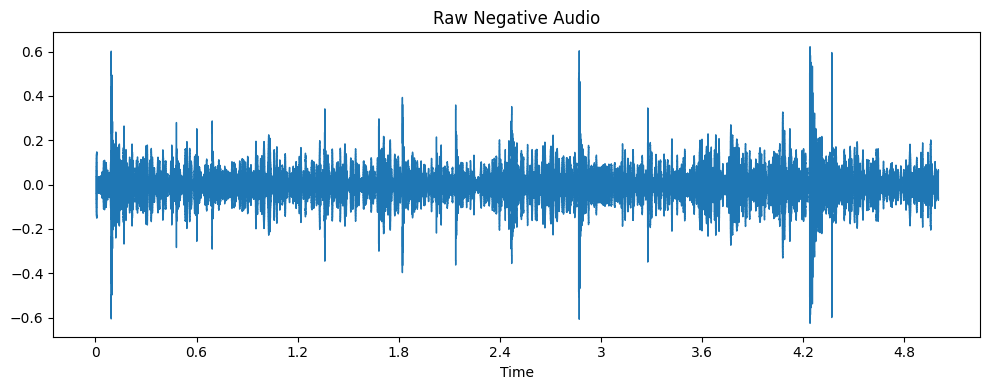

In [35]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(neg_audio, sr=target_sample_rate)
plt.title("Raw Negative Audio")
plt.tight_layout()
plt.show()

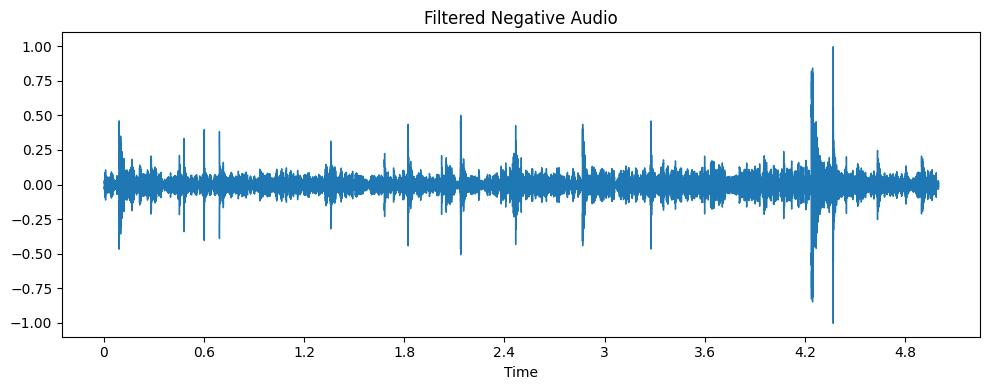

In [40]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(filtered_negative_audio, sr=target_sample_rate)
plt.title("Filtered Negative Audio")
plt.tight_layout()
plt.show()

In [50]:
rw_mel_spectrogram = librosa.feature.melspectrogram(y=filtered_rw_audio, sr=target_sample_rate, 
                                                         n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
log_rw_mel_spectrogram = librosa.power_to_db(rw_mel_spectrogram, ref=np.max)

In [51]:
neg_mel_spectrogram = librosa.feature.melspectrogram(y=filtered_negative_audio, sr=target_sample_rate, 
                                                         n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
log_neg_mel_spectrogram = librosa.power_to_db(neg_mel_spectrogram, ref=np.max)

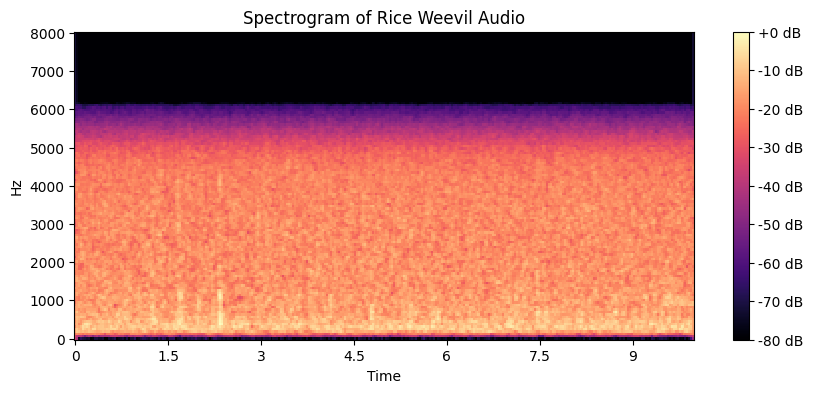

In [ ]:
# Plot Rice Weevil Audio
plt.figure(figsize=(10,4))
librosa.display.specshow(log_rw_mel_spectrogram, sr=target_sample_rate, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Rice Weevil Audio")
plt.show()

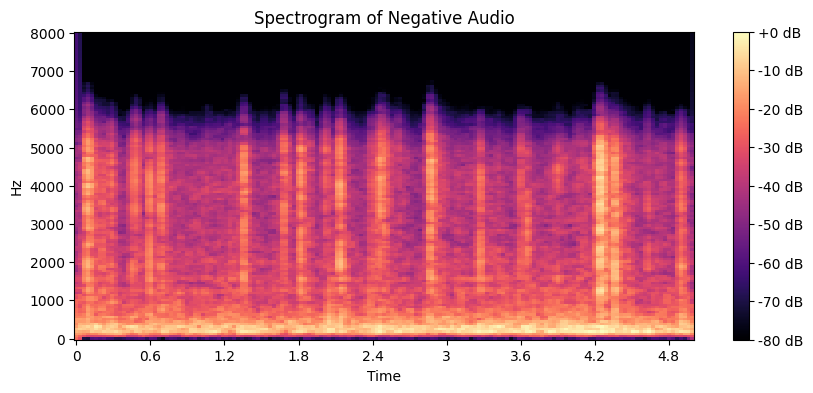

In [58]:
# Plot Negative Audio
plt.figure(figsize=(10,4))
librosa.display.specshow(log_neg_mel_spectrogram, sr=target_sample_rate, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Negative Audio")
plt.show()

In [ ]:
if log_rw_mel_spectrogram.shape[1] < target_width:
    padding = target_width - log_rw_mel_spectrogram.shape[1]
    log_rw_mel_spectrogram = np.pad(log_rw_mel_spectrogram, ((0, 0), (0, padding)), mode='constant')
else:
    log_rw_mel_spectrogram = log_rw_mel_spectrogram[:, :target_width]

In [ ]:
if log_neg_mel_spectrogram.shape[1] < target_width:
    padding = target_width - log_neg_mel_spectrogram.shape[1]
    log_neg_mel_spectrogram = np.pad(log_neg_mel_spectrogram, ((0, 0), (0, padding)), mode='constant')
else:
    log_neg_mel_spectrogram = log_neg_mel_spectrogram[:, :target_width]